<a href="https://colab.research.google.com/github/maxime-langevin/datascience4chemistry/blob/main/chemistry_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge rdkit

✨🍰✨ Everything looks OK!
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)
from matplotlib.widgets import Button

In [3]:
SMILES = ["Cc1ccc2c(c1)sc1c(=O)[nH]c3ccc(C(=O)NCCCN(C)C)cc3c12",
"O=C(NCCN1CCOCC1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1",
"CC(=O)CN1C(=O)C2CC(O)CN2C(=O)c2ccccc21",
"COc1cccc(NC(=O)c2oc3ccccc3c2NC(=O)c2ccc3c(c2)OCO3)c1",
"COC(=O)c1nnn(CC(=O)C(CC2CCNC2=O)NC(=O)C(C)NC(=O)C(C)NC(=O)C(CC(C)C)NC(C)=O)c1C(=O)OC",
"Cc1ccccc1N1C(=O)NC(=O)C(=Cc2cc(Br)c(N3CCOCC3)o2)C1=O",
"COc1nc(=Nc2ccc(Cl)cc2)sn1C",
"CC(C)(C)OC(=O)NC(Cc1ccc2cc(O)ccc2c1)C(=O)O",
"COc1cc(N2C(N)=C(C#N)C(c3ccccc3)C3=C2CC(C)(C)CC3=O)cc(OC)c1OC",
"CCC(=O)OC1(C(=O)CO)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C",
"CC(C)CC(C=O)NC(=O)C(COCc1ccccc1)NS(C)(=O)=O",
"O=C(NCC1CN(c2ccc(N3Cc4cccnc4C3)c(F)c2)C(=O)O1)C1CCC1",
"COc1cc(O)ccc1C=CC(=O)OCCCc1ccccc1O",
"O=C1C=CC(=Nn2cccc2)C=C1",
"NC(CCC(=O)Nc1ccccc1-n1cccc1)C(=O)O"]

X = [AllChem.GetMorganFingerprintAsBitVect(x, useChirality=False, radius=2) for x in [Chem.MolFromSmiles(s) for s in SMILES]]

pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_projected = pca.fit_transform(X)
x_pca, y_pca = pca_projected[:, 0], pca_projected[:, 1]

tsne_projected = tsne.fit_transform(X)
x_tsne, y_tsne = tsne_projected[:, 0], tsne_projected[:, 1]
# scale tsne projection to pca values
# more convenient for plotting on the same figure 
x_tsne = np.min(x_pca) + (np.max(x_pca)-np.min(x_pca))*(x_tsne-np.min(x_tsne))/(np.max(x_tsne)-np.min(x_tsne))
y_tsne = np.min(y_pca) + (np.max(y_pca)-np.min(y_pca))*(y_tsne-np.min(y_tsne))/(np.max(y_tsne)-np.min(y_tsne))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Click on the figure.
Hover over the points to show molecule corresponding to data point.
Click on "PCA" or "t-SNE" to modify dimensionality reduction techniques.

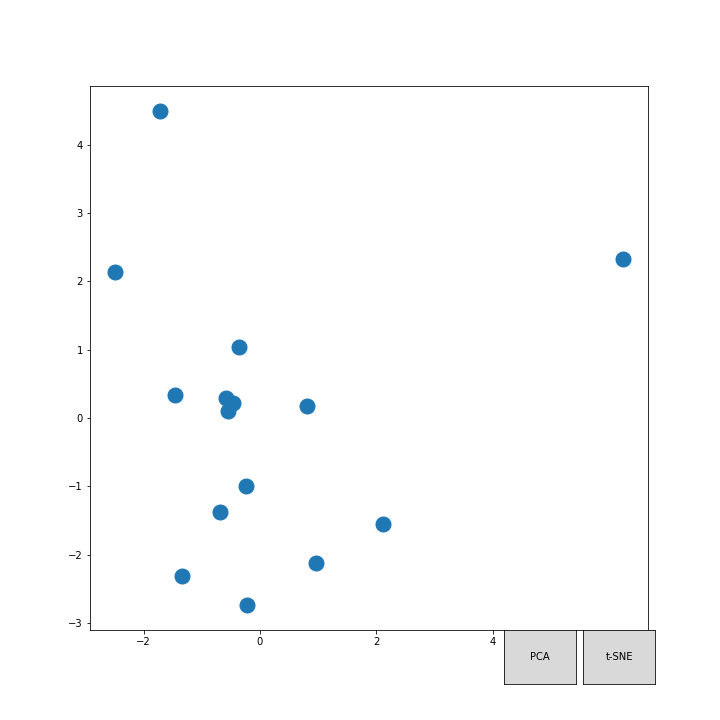

In [20]:
# create figure and plot scatter
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
line, = ax.plot(x_pca,y_pca, ls="", marker="o", markersize=15)

images = [Draw.MolToImage(mol, size=(250, 250)) for mol in [Chem.MolFromSmiles(s) for s in SMILES]]

# create the annotations box
im = OffsetImage(images[0], zoom=1)
xybox=(5., 5.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        # necessary modification to exploit relevant xy depending on button choice 
        ab.xy =(callback.x[ind], callback.y[ind])
        # set the image corresponding to that point
        im.set_data(images[ind])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 

class Index:
    x = x_pca
    y = y_pca

    def pca(self, event):
        line.set_xdata(x_pca)
        line.set_ydata(y_pca)
        self.x = x_pca
        self.y = y_pca
        plt.draw()

    def tsne(self, event):
        line.set_xdata(x_tsne)
        line.set_ydata(y_tsne)
        self.x = x_tsne
        self.y = y_tsne
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axprev, 'PCA')
bnext.on_clicked(callback.pca)
bprev = Button(axnext, 't-SNE')
bprev.on_clicked(callback.tsne)

plt.show()